In [14]:
#japanize-matplotlibをインストール
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=76f9e8e842613802fe01b8b7cf6695ce2da203055b1d0c01d87062b8e9fcf87e
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
#pandasをインポート
import pandas as pd
#sample_pandas_6.csvの読込
df =pd.read_csv("/content/sample_pandas_6.csv")
#データの確認
df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [3]:
#単価（税込み）を作成
def tax(x):
  return x*1.10
df["単価"].apply(tax)

0      858.0
1       99.0
2      858.0
3      660.0
4      660.0
       ...  
195    660.0
196     99.0
197    363.0
198    462.0
199    132.0
Name: 単価, Length: 200, dtype: float64

In [4]:
#列名を単価（税込み）に指定
tax_series = df["単価"].apply(tax)
tax_series.name = "単価（税込み）"

#dfに「単価（税込み）」列を結合
pd.concat([df, tax_series],axis=1)

,発注日,商品番号,商品名,単価,在庫,注文数,単価（税込み）
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,660.0
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,99.0
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,363.0
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,462.0


In [5]:
#category.csvの読み込み
df_category = pd.read_csv("/content/category.csv")
df_category

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [6]:
#dfにdf_categoryをマージ
df_merge = pd.merge(df,df_category[["商品番号", "カテゴリー"]], how="inner", on="商品番号")
df_merge

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
2,2021-12-11,YY4HAAZR,商品サンプル YY4HAAZR,780,50,36,弁当
3,2016-09-15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54,弁当
4,2024-01-18,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
...,...,...,...,...,...,...,...
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート


弁当       49
菓子類      38
飲料水      36
デザート     30
雑貨       27
図書・新聞    20
Name: カテゴリー, dtype: int64


<Axes: >

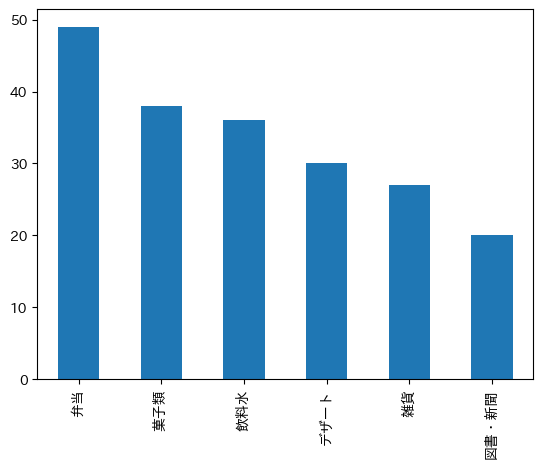

In [19]:
#Matplotlibとjapanize_matplotlibをインポート
import matplotlib.pyplot as plt

#japanize-matplotlibをインポート
import japanize_matplotlib

#カテゴリー列の要素(弁当・デザートなど)のユニークな出現頻度をカウント
unique_count = df_merge["カテゴリー"].value_counts()
print(unique_count)
unique_count.plot(kind='bar')



In [24]:
#ある基準列(商品番号列)ごとに要素をグループにまとめサブ列を集計するメソッドと、基本統計量を算出するメソッドを組み合わせたコードを記載
df_merge.groupby("商品番号")["在庫"].mean().describe()


count    10.000000
mean     25.642887
std       3.098343
min      21.136364
25%      23.676471
50%      26.232143
75%      26.962963
max      31.428571
Name: 在庫, dtype: float64